In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
os.chdir("C:/Users/Tom/Documents/Course/Semester 3/Project/Data Sets/")

In [3]:
IAQ_LR = pd.read_csv("IAQ_livingroom.csv", parse_dates=['Date and Time'], index_col='Date and Time', dayfirst=True)
IAQ_KR = pd.read_csv("IAQ_kitchen.csv", parse_dates=['Date and Time'], index_col='Date and Time', dayfirst=True)
IAQ_BR = pd.read_csv("IAQ_bedroom.csv", parse_dates=['Date and Time'], index_col='Date and Time', dayfirst=True)

In [4]:
Cal_LR = IAQ_LR[IAQ_LR["Calibration"] == 1].drop(["Calibration"], axis=1)
Cal_KR = IAQ_KR[IAQ_KR["Calibration"] == 1].drop(["Calibration"], axis=1)
Cal_BR = IAQ_BR[IAQ_BR["Calibration"] == 1].drop(["Calibration"], axis=1)

IAQ_LR = IAQ_LR[IAQ_LR["Calibration"] == 0].drop(["Calibration"], axis=1)
IAQ_KR = IAQ_KR[IAQ_KR["Calibration"] == 0].drop(["Calibration"], axis=1)
IAQ_BR = IAQ_BR[IAQ_BR["Calibration"] == 0].drop(["Calibration"], axis=1)

IAQ_LR["LivingRoom"] = 1
IAQ_LR["Kitchen"] = 0
IAQ_LR["Bedroom"] = 0
IAQ_KR["LivingRoom"] = 0
IAQ_KR["Kitchen"] = 1
IAQ_KR["Bedroom"] = 0
IAQ_BR["LivingRoom"] = 0
IAQ_BR["Kitchen"] = 0
IAQ_BR["Bedroom"] = 1

In [5]:
activity_LR = pd.read_csv("activity_livingroom.csv", parse_dates=['Date and Time'], index_col='Date and Time', dayfirst=True)
activity_KR = pd.read_csv("activity_Kitchen.csv", parse_dates=['Date and Time'], index_col='Date and Time', dayfirst=True)
activity_BR = pd.read_csv("activity_Bedroom.csv", parse_dates=['Date and Time'], index_col='Date and Time', dayfirst=True)

In [6]:
LR = pd.merge(IAQ_LR, activity_LR, left_index=True, right_index=True).merge(
        activity_KR, left_index=True, right_index=True).merge(
        activity_BR, left_index=True, right_index=True)

KR = pd.merge(IAQ_KR, activity_KR, left_index=True, right_index=True).merge(
        activity_LR, left_index=True, right_index=True).merge(
        activity_BR, left_index=True, right_index=True)

BR = pd.merge(IAQ_BR, activity_BR, left_index=True, right_index=True).merge(
        activity_LR, left_index=True, right_index=True).merge(
        activity_KR, left_index=True, right_index=True)

In [7]:
LR['Hour'] = LR.index.strftime('%H').astype(int)
LR["timeOfDay"]=pd.cut(LR.index.hour, [-1, 5, 11, 17, 24], labels=['Night', "Morning", 'Afternoon', 'Evening'])
LR["timeOfDay"] = LR["timeOfDay"].cat.codes

KR['Hour'] = KR.index.strftime('%H').astype(int)
KR["timeOfDay"]=pd.cut(KR.index.hour, [-1, 5, 11, 17, 24], labels=['Night', "Morning", 'Afternoon', 'Evening'])
KR["timeOfDay"] = KR["timeOfDay"].cat.codes

BR['Hour'] = BR.index.strftime('%H').astype(int)
BR["timeOfDay"]=pd.cut(BR.index.hour, [-1, 5, 11, 17, 24], labels=['Night', "Morning", 'Afternoon', 'Evening'])
BR["timeOfDay"] = BR["timeOfDay"].cat.codes

c:\python\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


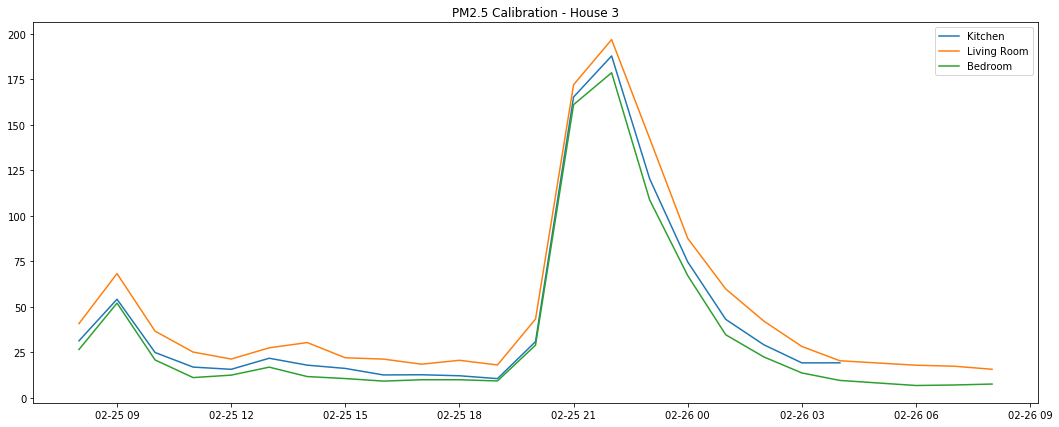

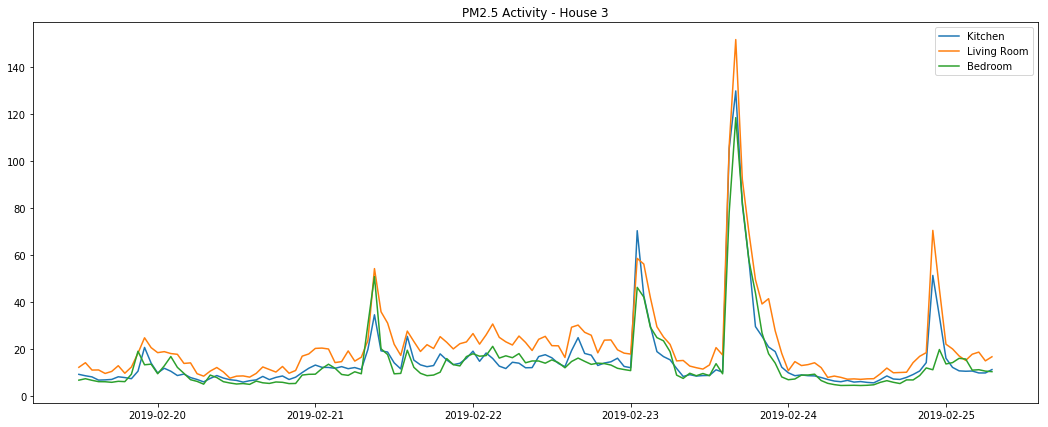

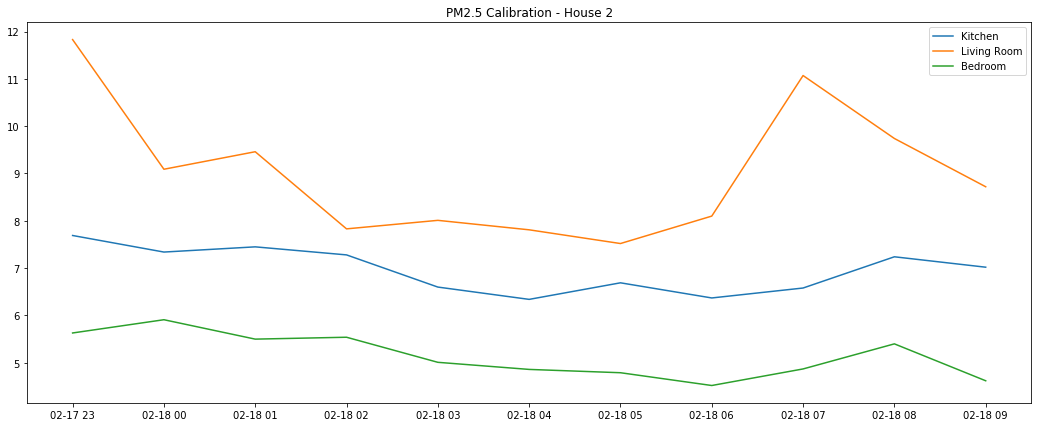

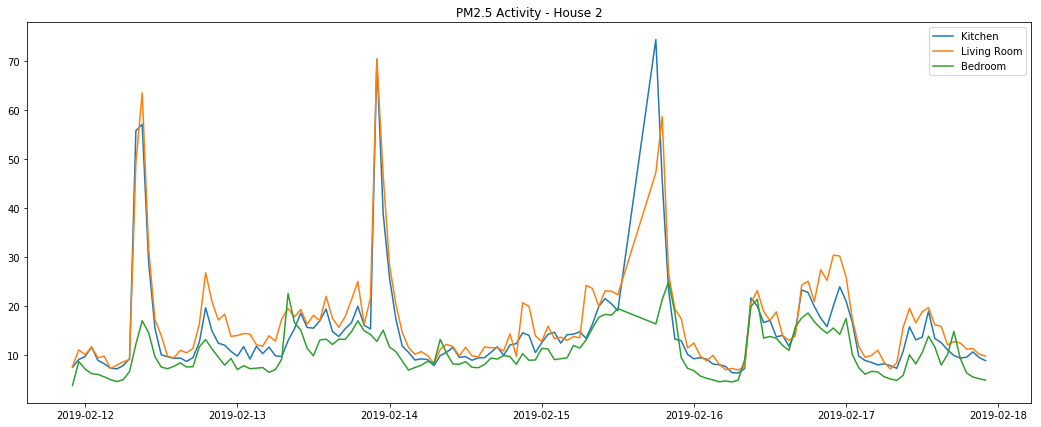

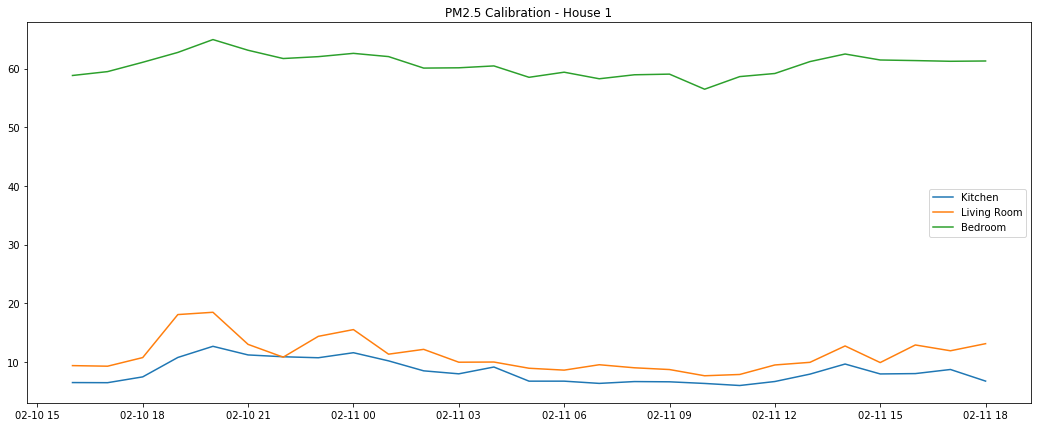

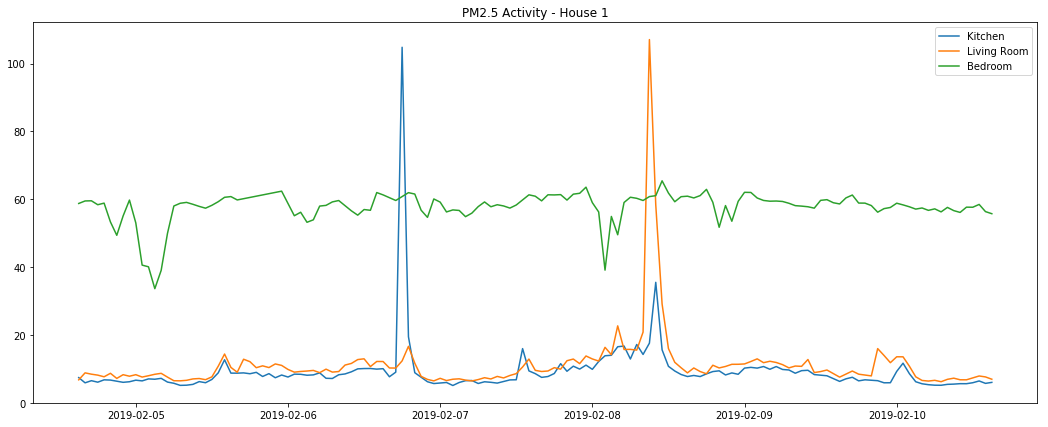

In [8]:
plt.figure(figsize=(18,7))
plt.plot(Cal_KR["PM2.5"]   [Cal_KR["House"] == 3], label='Kitchen')
plt.plot(Cal_LR["PM2.5"]   [Cal_LR["House"] == 3], label='Living Room')
plt.plot(Cal_BR["PM2.5"]   [Cal_BR["House"] == 3], label='Bedroom')
plt.legend()
plt.title(label="PM2.5 Calibration - House 3")
plt.show()

plt.figure(figsize=(18,7))
plt.plot(IAQ_KR["PM2.5"]   [IAQ_KR["House"] == 3], label='Kitchen')
plt.plot(IAQ_LR["PM2.5"]   [IAQ_LR["House"] == 3], label='Living Room')
plt.plot(IAQ_BR["PM2.5"]   [IAQ_BR["House"] == 3], label='Bedroom')
plt.legend()
plt.title(label="PM2.5 Activity - House 3")
plt.show()


plt.figure(figsize=(18,7))
plt.plot(Cal_KR["PM2.5"]   [Cal_KR["House"] == 2], label='Kitchen')
plt.plot(Cal_LR["PM2.5"]   [Cal_LR["House"] == 2], label='Living Room')
plt.plot(Cal_BR["PM2.5"]   [Cal_BR["House"] == 2], label='Bedroom')
plt.legend()
plt.title(label="PM2.5 Calibration - House 2")
plt.show()

plt.figure(figsize=(18,7))
plt.plot(IAQ_KR["PM2.5"]   [IAQ_KR["House"] == 2], label='Kitchen')
plt.plot(IAQ_LR["PM2.5"]   [IAQ_LR["House"] == 2], label='Living Room')
plt.plot(IAQ_BR["PM2.5"]   [IAQ_BR["House"] == 2], label='Bedroom')
plt.legend()
plt.title(label="PM2.5 Activity - House 2")
plt.show()


plt.figure(figsize=(18,7))
plt.plot(Cal_KR["PM2.5"]   [Cal_KR["House"] == 1], label='Kitchen')
plt.plot(Cal_LR["PM2.5"]   [Cal_LR["House"] == 1], label='Living Room')
plt.plot(Cal_BR["PM2.5"]   [Cal_BR["House"] == 1], label='Bedroom')
plt.legend()
plt.title(label="PM2.5 Calibration - House 1")
plt.show()

plt.figure(figsize=(18,7))
plt.plot(IAQ_KR["PM2.5"]   [IAQ_KR["House"] == 1], label='Kitchen')
plt.plot(IAQ_LR["PM2.5"]   [IAQ_LR["House"] == 1], label='Living Room')
plt.plot(IAQ_BR["PM2.5"]   [IAQ_BR["House"] == 1], label='Bedroom')
plt.legend()
plt.title(label="PM2.5 Activity - House 1")
plt.show();

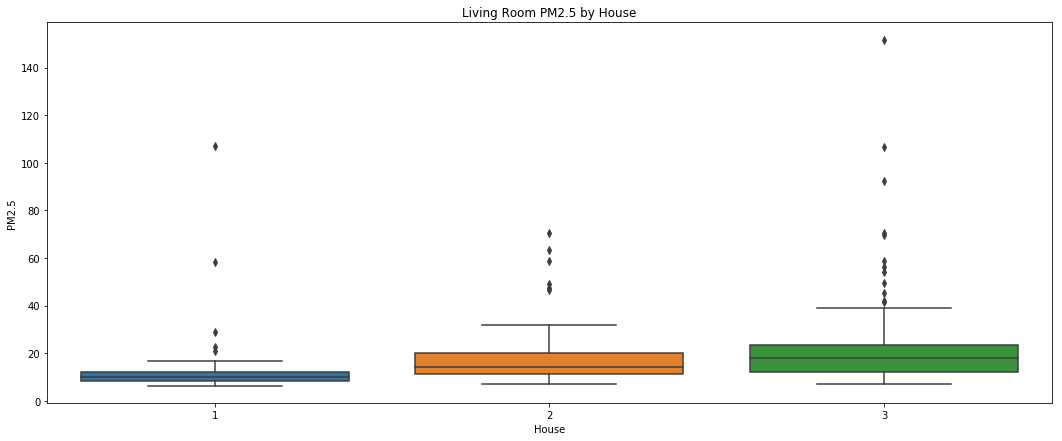

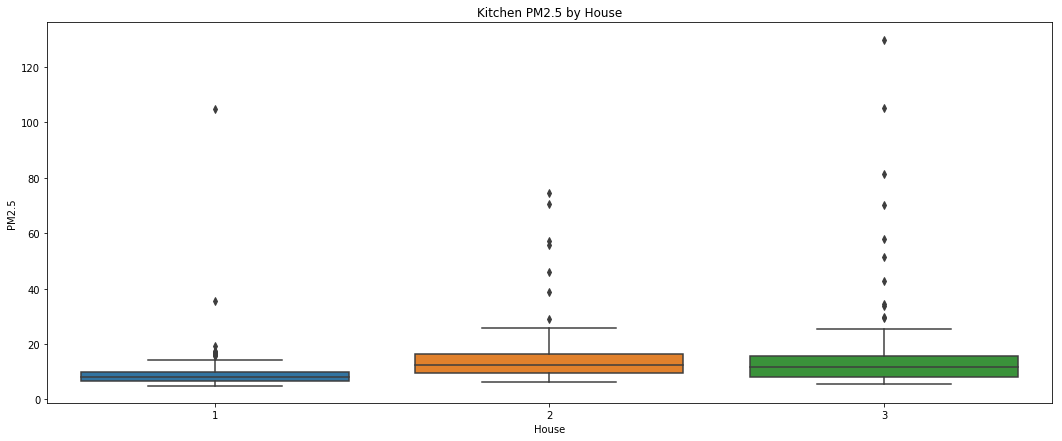

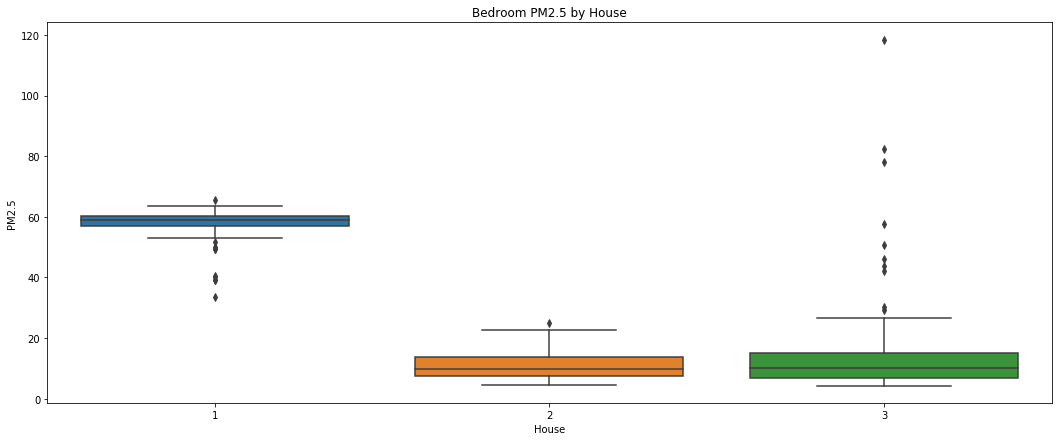

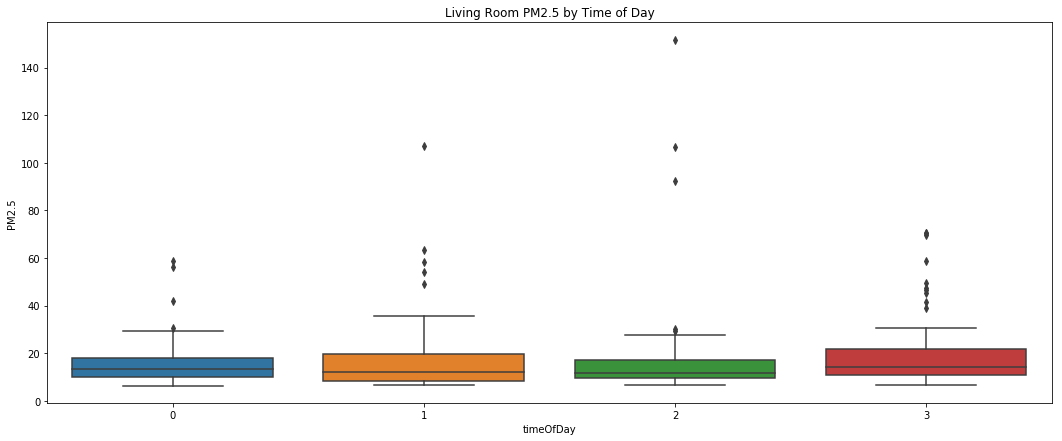

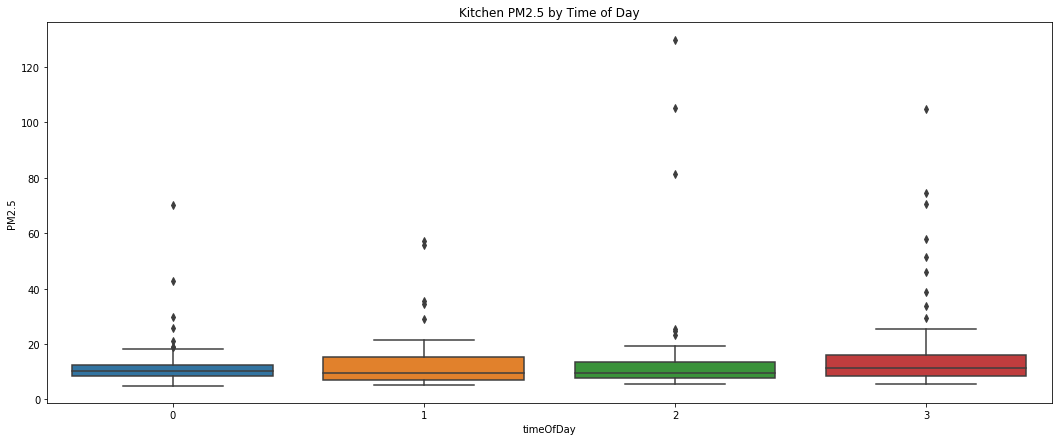

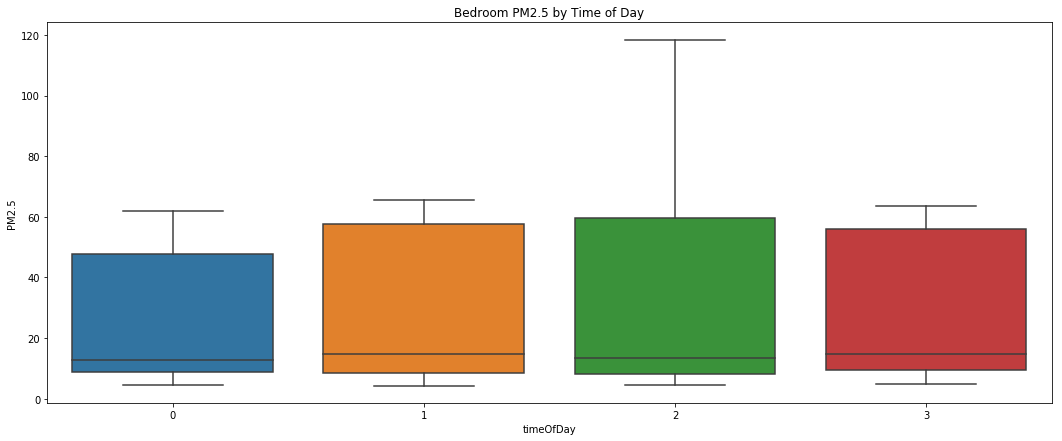

In [9]:
plt.figure(figsize=(18,7))
sns.boxplot(x=LR['House'], y=LR['PM2.5'], orient='v')
plt.title(label="Living Room PM2.5 by House")
plt.show()
plt.figure(figsize=(18,7))
sns.boxplot(x=KR['House'], y=KR['PM2.5'], orient='v')
plt.title(label="Kitchen PM2.5 by House")
plt.show()
plt.figure(figsize=(18,7))
sns.boxplot(x=BR['House'], y=BR['PM2.5'], orient='v')
plt.title(label="Bedroom PM2.5 by House")
plt.show()
plt.figure(figsize=(18,7))
sns.boxplot(x=LR['timeOfDay'], y=LR['PM2.5'], orient='v')
plt.title(label="Living Room PM2.5 by Time of Day")
plt.show()
plt.figure(figsize=(18,7))
sns.boxplot(x=KR['timeOfDay'], y=KR['PM2.5'], orient='v')
plt.title(label="Kitchen PM2.5 by Time of Day")
plt.show()
plt.figure(figsize=(18,7))
sns.boxplot(x=BR['timeOfDay'], y=BR['PM2.5'], orient='v')
plt.title(label="Bedroom PM2.5 by Time of Day")
plt.show();

In [10]:
LR = LR.dropna(axis=1).drop(["House"], axis=1)
KR = KR.dropna(axis=1).drop(["House"], axis=1)
BR = BR.dropna(axis=1).drop(["House"], axis=1)

In [11]:
LR.columns

Index(['Temp', 'RH', 'PM2.5', 'TVOC', 'CO2', 'CO', 'AirPres', 'Ozone', 'NO2',
       'LivingRoom', 'Kitchen', 'Bedroom', 'LR_MaxOccupancy', 'LR_HeatingOn',
       'KR_MaxOccupancy', 'Boiling', 'Frying', 'KR_HeatingOn', 'KR_Hoovering',
       'KR_Mopping', 'DishwasherOn', 'BR_MaxOccupancy', 'BR_OpenWindows',
       'BR_OpenCurtains', 'BR_HeatingOn', 'Hour', 'timeOfDay'],
      dtype='object')

In [ ]:
def train_test (df, target):
        
    X = df.drop([target], axis=1)     
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42)
    
    return (X_train, X_test, y_train, y_test, X, y)

In [ ]:
X_train, X_test, y_train, y_test, X, y = train_test(BR, "PM2.5")

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()
